In [17]:
import tensorflow as tf
import tensorflow.keras as keras
import os

import matplotlib.pyplot as plt

print(tf.__version__)


2.5.0


In [42]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

(32, 32, 3)
[6]
(50000, 32, 32, 3)
(10000, 32, 32, 3)


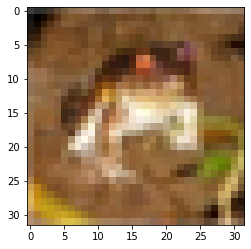

In [15]:
plt.imshow(x_train[0])
print(x_train[0].shape)
print(y_train[0])
print(x_train.shape)
print(x_test.shape)
#print("x_train[0]:\n", x_train[0])

In [44]:

from tensorflow.keras import Model

class Baseline(Model):
    def __init__(self):
        super(Baseline,self).__init__()
        self.c1 =    keras.layers.Conv2D(kernel_size=(5,5),filters=6,padding='same')
        self.b1 =     keras.layers.BatchNormalization()
        self.a1 =    keras.layers.Activation('relu')
        self.p1 =    keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same')
        self.d1 =    keras.layers.Dropout(0.2)
        self.flatten =   keras.layers.Flatten()
        self.f1 =    keras.layers.Dense(128,activation='relu')
        self.d2 =    keras.layers.Dropout(0.2)
        self.f2 =    keras.layers.Dense(10, activation='softmax')
        
    def call(self,x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)
        
        x = self.flatten(x)
        x = self.f1(x)
        x = self.d1(x)
        y = self.f2(x)
        
        return y

model = Baseline()

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer='adam',metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/Baseline.ckpt"
if(os.path.exists(checkpoint_save_path + '.index')):
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
                filepath=checkpoint_save_path,
                save_weight_only=True, 
                save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_test, y_test), callbacks=[cp_callback])

model.summary()


Epoch 1/2
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6388 - sparse_categorical_accuracy: 0.4094 - val_loss: 1.4355 - val_sparse_categorical_accuracy: 0.4791
INFO:tensorflow:Assets written to: ./checkpoint/Baseline.ckpt/assets
Epoch 2/2
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3950 - sparse_categorical_accuracy: 0.4990 - val_loss: 1.3448 - val_sparse_categorical_accuracy: 0.5148
INFO:tensorflow:Assets written to: ./checkpoint/Baseline.ckpt/assets
Model: "baseline_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           multiple                  456       
_________________________________________________________________
batch_normalization_17 (Batc multiple                  24        
_________________________________________________________________
activation_17 (Activation)   multiple                  0         
_____________

In [45]:
history.history['loss']

[1.6387898921966553, 1.3950046300888062]

In [47]:

from tensorflow.keras import Model

class Baseline(Model):
    def __init__(self):
        super(Baseline,self).__init__()
        self.c1 =    keras.layers.Conv2D(kernel_size=(5,5),filters=6,padding='valid', activation = 'sigmoid')
        self.p1 =    keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='valid')
        
        self.f1 =    keras.layers.Flatten()
        
        self.de1 =    keras.layers.Dense(128,activation='sigmoid')
        self.de2 =    keras.layers.Dense(84,activation='sigmoid')
        self.de3 =    keras.layers.Dense(10, activation='softmax')
        
    def call(self,x):
        x = self.c1(x)
        x = self.a1(x)
        x = self.p1(x)
        
        x = self.c1(x)
        x = self.b1(x)
        x = self.p1(x)
        
        x = self.f1(x)
        
        x = self.de1(x)
        x = self.de2(x)
        x = self.de3(x)
        
        return y

model = Baseline()

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer='adam',metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/Baseline.ckpt"
if(os.path.exists(checkpoint_save_path + '.index')):
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
                filepath=checkpoint_save_path,
                save_weight_only=True, 
                save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_test, y_test), callbacks=[cp_callback])

model.summary()


Epoch 1/2


AttributeError: in user code:

    /home/sun/.pyenv/versions/DataVisualization/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    <ipython-input-47-83a7598a3d14>:17 call  *
        x = self.a1(x)

    AttributeError: 'Baseline' object has no attribute 'a1'


In [ ]:


     #self.model = tf.keras.models.Sequential([
        self.c1 =    keras.layers.Conv2D(kernel_size=(5,5),filters=6,padding='same'),
        self.c2 =     keras.layers.BatchNormalization(),
        self.c3 =    keras.layers.Activation('relu'),
            keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
            keras.layers.Dropout(0.2),
            keras.layers.Flatten(),
            keras.layers.Dense(128,activation='relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(10, activation='softmax')
            ])